### PyTorch Basics 
#### 2. Dataset and Dataloader

In [2]:
import torch 
from torch.utils.data import Dataset 
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [3]:
import os
home=os.path. expanduser("~")
data_dir=os.path.join(home, "data")
# Loading Fashion-MNIST training dataset 
training_data = datasets.FashionMNIST(
    root= data_dir, # directory for data storage 
    train=True, 
    download=True,
    transform=ToTensor() # each PIL.image --> [C*H*W] torch.FloatTensor
)

# Loading Fashion-MNIST test dataset 
test_data = datasets.FashionMNIST(
    root= data_dir, 
    train=False, # This is the only difference btw train vs. test data
    download=True, 
    transform=ToTensor()
)

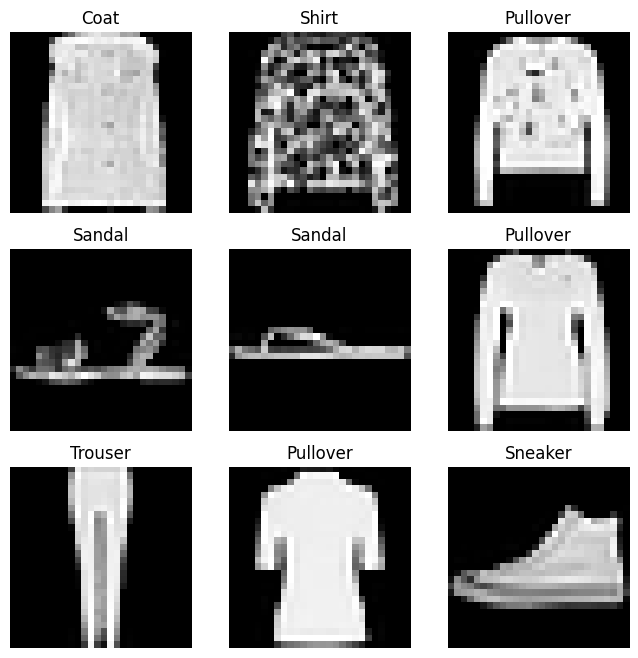

In [4]:
# Data iteration & visualization
# 1) mapping label # --> name
labels_map ={
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

# 2) generate whole canvas
figure = plt.figure(figsize=(8,8))

# 3) setting grid: 3 col * 3 rows
cols, rows = 3, 3 # sets how many images to be drawn in one screen, 3*3 =9 in this case

for i in range(1, cols*rows+1): # loop from 1 to 9, add_subplot in Matplotlib = 1-based --> start from 1 
    # 4) select index randomly: 1 from (0~len(training_data)-1)
    sample_idx=torch.randint(len(training_data), size=(1,)).item() 
   
    # 5) Retrieve the image and label at that index
    img, label = training_data[sample_idx] 
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    # When loaded, `img` has shape (1, height, width) for a single grayscale channel.
    # img.squeeze() removes any dimensions of size 1, yielding a (height, width) tensor.
    # cmap="gray" tells matplotlib to render the 2D array in grayscale.
plt.show()
    

In [5]:
import os 
import pandas as pd
from torchvision.io import decode_image

class CustomImageDataset(Dataset): # inherits Dataset 
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir=img_dir
        self.transform=transform 
        self.target_transform=target_transform
    
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0])
        image=decode_image(image_path)
        label=self.img_labels.iloc[idx,1]
        if self.transform:
            image=self.transform(image)
        if self.target_transform:
            label=self.target_transform(label)
        return image, label 

### Preparing Data for Training with DataLoaders
#### The Dataset retrieves our dataset's 1) features 2) lables one sample at a time
#### While training, we'd like to 1) pass samples in minibatches 2) reshuffle the data at avery epoch to reduce overfitting and 3) use Python's multiprocessing to speed up data retrieval

In [6]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size =64, shuffle=True)
test_dataloader=DataLoader(test_data, batch_size=64, shuffle=True)

### Iterate through the DataLoader



torch.Size([64, 1, 28, 28])
torch.Size([64])


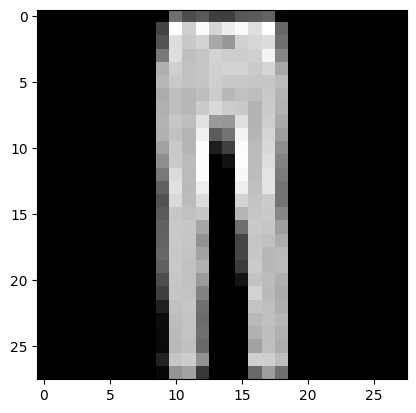

tensor(1)


In [10]:
# Display image and label 
train_features, train_labels = next(iter(train_dataloader)) 
# iter(): object iterating thru
# next() --> iter() thru one batch 

print(train_features.size()) # (#in one batch * C * W * H)
print(train_labels.size())

img=train_features[0].squeeze()
label=train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(label)